In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
# %matplotlib inline

In [21]:
df = pd.read_csv('Dataset1.csv')
df_array = df.values

In [22]:
# df

In [23]:
k = 4 #2, 3, 4 #number of clusters
num_iter = 15 # 15, 50, 100, 500, 1000 #number of iterations
m, n = df.shape

In [24]:
#centroids:
centroids = np.zeros((k, n)) # = for k colors 
random_index = np.random.randint(0, m)
for i in range(k):
    centroids[i, 0] = df_array[random_index, 0]
    centroids[i, 1] = df_array[random_index, 1]

In [25]:
#euclidean distance:
def distance(x1, y1, x2, y2):
    dist = np.square(x1-x2) + np.square(y1-y2)
    dist = np.sqrt(dist)
    return dist

In [26]:
#k-means:

clusters = []

for iteration in range(num_iter):
    
    index_matrix = np.array([])
    flag = 0
    dic = {}
    for i in range(k):
        dic[i+1] = np.array([]).reshape(2, 0)
    
    for j in range(m):
        min_dist = 1000 #just a big value!
        for i in range(k):
            if(distance(df_array[j, 0], df_array[j, 1], centroids[i, 0], centroids[i, 1]) < min_dist):
                min_dist = distance(df_array[j, 0], df_array[j, 1], centroids[i, 0], centroids[i, 1])
                flag = i
            else:
                continue
        index_matrix = np.append(index_matrix, flag)
        dic[index_matrix[j] + 1] = np.c_[dic[index_matrix[j] + 1], df_array[j]]
        
    for i in range(k):
        dic[i+1] = dic[i+1].T
        
        
    #updating the centroids:
    for i in range(k):
        sum_x = 0
        sum_y = 0
        count = 0
        for j in range(m):
            if(index_matrix[j] == i):
                sum_x += df_array[j, 0]
                sum_y += df_array[j, 1]
                count += 1
        if(count == 0):
            count = 1
        centroids[i, 0] = sum_x/count
        centroids[i, 1] = sum_y/count
        
    clusters = dic

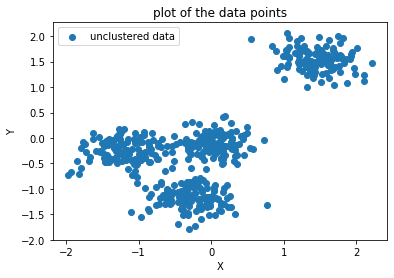

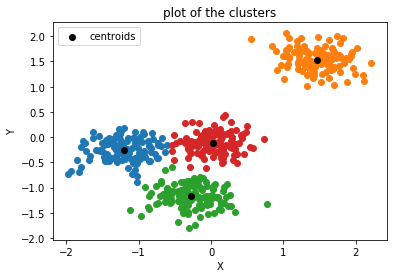

In [27]:
#now, we visualize the data:

#unclustered data:
plt.scatter(x = df_array[:, 0], y = df_array[:, 1], label = 'unclustered data') #color: c = 'black'
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('plot of the data points')
plt.show()

#clustered data:
# color = ['red', 'blue', 'green', 'yellow']
# labels = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
for i in range(k):
    plt.scatter(x = dic[i+1][:, 0], y = dic[i+1][:, 1]) #c = color[v], label = labels[v]
plt.scatter(x = centroids[:, 0], y = centroids[:, 1],  c = 'black', label = 'centroids')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('plot of the clusters')
plt.show()
